In [1]:
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

In [2]:
df = pd.read_excel('./최종 데이터 그래프그리기용.xlsx') 
print(df)

      Sample_ID GROUP  COHORT SEX  AGE     Trait FitbitOX      Fitbit_ID  HTN  \
0         S0001   SMI       2   M   60  fitbit_O        O  sevrance00001  NaN   
1         S0002   SMI       2   M   61  fitbit_O        O  sevrance00002  NaN   
2         S0003   SMI       2   F   52  fitbit_O        O  sevrance00003  NaN   
3         S0004   SMI       2   F   41  fitbit_O        O  sevrance00004  NaN   
4         S0005   SMI       2   F   41  fitbit_O        O  sevrance00005  NaN   
..          ...   ...     ...  ..  ...       ...      ...            ...  ...   
383  MetS_S0280  MetS       1   F   24  fitbit_O        O   gnfmmets+139  NaN   
384  MetS_S0281  MetS       1   F   44  fitbit_O        O   gnfmmets+140  NaN   
385  MetS_S0282  MetS       1   F   37  fitbit_O        O   gnfmmets+141  1.0   
386  MetS_S0283  MetS       1   M   51  fitbit_X        X              X  NaN   
387  MetS_S0284  MetS       1   F   42  fitbit_X        X              X  NaN   

      DM  ...  BDI_Q13_2 BD

psqi_df=df[['Sample_ID','GROUP','COHORT','SEX','AGE','TG_1','FatPercentage _1','BMI_1','PSQI_TOTAL_1','TG_2','FatPercentage_2','BMI_2','PSQI_TOTAL_2']]

psqi_df=df[['Sample_ID','GROUP','COHORT','SEX','AGE','Insulin _1','FatPercentage _1','TG_1','BMI_1','AST_1','BUN_1',
            'PSQI_TOTAL_1','PSQI_C1_1','PSQI_C2_1','PSQI_C3_1','PSQI_C4_1','PSQI_C5_1','PSQI_C6_1','PSQI_C7_1','PSQI_Q1_1','PSQI_Q2_1','PSQI_Q3_1','PSQI_Q4_1',
            'PSQI_Q5a_1','PSQI_Q5b_1','PSQI_Q5c_1','PSQI_Q5d_1','PSQI_Q5e_1','PSQI_Q5f_1','PSQI_Q5g_1','PSQI_Q5h_1','PSQI_Q5i_1','PSQI_Q5j_1','PSQI_Q6_1','PSQI_Q7_1','PSQI_Q8_1','PSQI_Q9_1',
              'Insulin _2','FatPercentage_2','TG_2','BMI_2','AST_2','BUN_2','PSQI_TOTAL_2','PSQI_C1_2','PSQI_C2_2','PSQI_C3_2','PSQI_C4_2','PSQI_C5_2','PSQI_C6_2','PSQI_C7_2','PSQI_Q1_2','PSQI_Q2_2','PSQI_Q3_2','PSQI_Q4_2',
            'PSQI_Q5a_2','PSQI_Q5b_2','PSQI_Q5c_2','PSQI_Q5d_2','PSQI_Q5e_2','PSQI_Q5f_2','PSQI_Q5g_2','PSQI_Q5h_2','PSQI_Q5i_2','PSQI_Q5j_2','PSQI_Q6_2','PSQI_Q7_2','PSQI_Q8_2','PSQI_Q9_2']]

psqi_df=df[['Sample_ID','GROUP','COHORT','SEX','AGE','HDL_1','DBP_1','Waist_1','SBP_1','BMI_1','Fat_1_x','PSQI_TOTAL_1','TG_1',
           'HDL_2','DBP_2','Waist_2','SBP_2','BMI_2','Fat_2_x','PSQI_TOTAL_2','TG_2']]

In [156]:
psqi_df=df[['Sample_ID','GROUP','COHORT','SEX','AGE','Insulin _1','FatPercentage _1','TG_1','BMI_1','AST_1','BUN_1','HDL_1','DBP_1','Waist_1','SBP_1','Fat_1_x',
            'PSQI_TOTAL_1','PSQI_C1_1','PSQI_C2_1','PSQI_C3_1','PSQI_C4_1','PSQI_C5_1','PSQI_C6_1','PSQI_C7_1','PSQI_Q1_1','PSQI_Q2_1','PSQI_Q3_1','PSQI_Q4_1',
            'PSQI_Q5a_1','PSQI_Q5b_1','PSQI_Q5c_1','PSQI_Q5d_1','PSQI_Q5e_1','PSQI_Q5f_1','PSQI_Q5g_1','PSQI_Q5h_1','PSQI_Q5i_1','PSQI_Q5j_1','PSQI_Q6_1','PSQI_Q7_1','PSQI_Q8_1','PSQI_Q9_1',
              'Insulin _2','FatPercentage_2','TG_2','BMI_2','AST_2','BUN_2','HDL_2','DBP_2','Waist_2','SBP_2','Fat_2_x',
            'PSQI_TOTAL_2','PSQI_C1_2','PSQI_C2_2','PSQI_C3_2','PSQI_C4_2','PSQI_C5_2','PSQI_C6_2','PSQI_C7_2','PSQI_Q1_2','PSQI_Q2_2','PSQI_Q3_2','PSQI_Q4_2',
            'PSQI_Q5a_2','PSQI_Q5b_2','PSQI_Q5c_2','PSQI_Q5d_2','PSQI_Q5e_2','PSQI_Q5f_2','PSQI_Q5g_2','PSQI_Q5h_2','PSQI_Q5i_2','PSQI_Q5j_2','PSQI_Q6_2','PSQI_Q7_2','PSQI_Q8_2','PSQI_Q9_2']]

In [157]:
psqi_df

,Sample_ID,GROUP,COHORT,SEX,AGE,Insulin _1,FatPercentage _1,TG_1,BMI_1,AST_1,...,PSQI_Q5e_2,PSQI_Q5f_2,PSQI_Q5g_2,PSQI_Q5h_2,PSQI_Q5i_2,PSQI_Q5j_2,PSQI_Q6_2,PSQI_Q7_2,PSQI_Q8_2,PSQI_Q9_2
0,S0001,SMI,2,M,60,7.7,15.0,81,21.110190,21.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,S0002,SMI,2,M,61,5.4,29.5,106,27.782064,29.0,...,3.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0
2,S0003,SMI,2,F,52,5.1,39.1,231,24.944742,16.0,...,3.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0
3,S0004,SMI,2,F,41,4.2,29.1,94,22.620489,16.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0
4,S0005,SMI,2,F,41,3.2,24.6,70,20.524157,26.0,...,0.0,0.0,0.0,1.0,1.0,1.0,3.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,MetS_S0280,MetS,1,F,24,11.3,34.4,51,34.803410,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
384,MetS_S0281,MetS,1,F,44,10.6,43.8,104,30.903615,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
385,MetS_S0282,MetS,1,F,37,12.2,35.8,128,28.676533,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
386,MetS_S0283,MetS,1,M,51,10.4,26.8,163,24.549738,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
#보조 호르몬 요법을 받고 있는 Cohort 3 제거 Filter 적용
psqi_df = psqi_df[(psqi_df['COHORT'] != 3)]
psqi_df

,Sample_ID,GROUP,COHORT,SEX,AGE,Insulin _1,FatPercentage _1,TG_1,BMI_1,AST_1,...,PSQI_Q5e_2,PSQI_Q5f_2,PSQI_Q5g_2,PSQI_Q5h_2,PSQI_Q5i_2,PSQI_Q5j_2,PSQI_Q6_2,PSQI_Q7_2,PSQI_Q8_2,PSQI_Q9_2
0,S0001,SMI,2,M,60,7.7,15.0,81,21.110190,21.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,S0002,SMI,2,M,61,5.4,29.5,106,27.782064,29.0,...,3.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0
2,S0003,SMI,2,F,52,5.1,39.1,231,24.944742,16.0,...,3.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0
3,S0004,SMI,2,F,41,4.2,29.1,94,22.620489,16.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0
4,S0005,SMI,2,F,41,3.2,24.6,70,20.524157,26.0,...,0.0,0.0,0.0,1.0,1.0,1.0,3.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,MetS_S0280,MetS,1,F,24,11.3,34.4,51,34.803410,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
384,MetS_S0281,MetS,1,F,44,10.6,43.8,104,30.903615,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
385,MetS_S0282,MetS,1,F,37,12.2,35.8,128,28.676533,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
386,MetS_S0283,MetS,1,M,51,10.4,26.8,163,24.549738,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [159]:
psqi_df=psqi_df.dropna()
psqi_df.reset_index(drop=True, inplace=True)
psqi_df.isnull().sum()
psqi_df=psqi_df.drop(["Sample_ID", "GROUP", "COHORT"],axis=1)
#1분, 매일다름, 정해진간이없음 삭제

In [160]:
#<150 (정상) : 0 -> 중간 값인 80으로 조정
#한단계씩 상향 조정
#150~199 (약간 높음 - 체중감량과 운동요법) : 1 -> 80~150 (정상)
#200~499 (높음 - 생활요법과 함께 약물치료 고려) : 2 -> 150~199 (약간 높음)
#>500 (아주 높음 - 즉시 약물치료) : 3 한명도 해당 X -> 200~ (높음~아주높음)

psqi_df["TG_1"] = psqi_df["TG_1"].apply(lambda x: 0 if x<80 else 1 if 80<=x<150 else 2 if 150<=x<200 else 3)
psqi_df["TG_2"] = psqi_df["TG_2"].apply(lambda x: 0 if x<80 else 1 if 80<=x<150 else 2 if 150<=x<200 else 3)

In [161]:
psqi_df["SEX"] = psqi_df["SEX"].apply(lambda x: 1 if x=='M' else 0)

In [162]:
psqi_df["Insulin _1"] = psqi_df["Insulin _1"].apply(lambda x: 0.1 if x=='<0.2' else 0 if x=='<0.1' else x)
psqi_df["Insulin _2"] = psqi_df["Insulin _1"].apply(lambda x: 0.1 if x=='<0.2' else 0 if x=='<0.1' else x)

In [163]:
psqi_df

,SEX,AGE,Insulin _1,FatPercentage _1,TG_1,BMI_1,AST_1,BUN_1,HDL_1,DBP_1,...,PSQI_Q5e_2,PSQI_Q5f_2,PSQI_Q5g_2,PSQI_Q5h_2,PSQI_Q5i_2,PSQI_Q5j_2,PSQI_Q6_2,PSQI_Q7_2,PSQI_Q8_2,PSQI_Q9_2
0,1,35,5.57,23.80,1,24.097789,25.0,15.5,57,77.0,...,2.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,1,46,7.35,20.00,1,23.472213,31.0,12.5,68,73.0,...,2.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0
2,1,32,9.26,24.00,0,23.744827,30.0,16.0,46,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0,33,3.52,22.00,0,20.616175,25.0,13.5,96,69.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
4,0,28,2.86,22.30,0,18.437500,21.0,9.1,62,75.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,0,63,4.20,40.30,0,26.259585,26.0,12.0,55,74.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
172,1,57,8.80,30.44,0,28.630719,91.0,15.0,51,81.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
173,0,35,6.30,31.00,1,21.641274,18.0,11.8,58,75.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
174,0,61,4.80,27.30,0,20.421366,18.0,16.2,58,85.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0


In [164]:
psqi_df['TG_1'].value_counts()

0    80
1    69
2    14
3    13
Name: TG_1, dtype: int64

In [165]:
psqi_df['TG_2'].value_counts()

0    82
1    71
3    13
2    10
Name: TG_2, dtype: int64

#x 배열 생성 (PSQI만)
psqi_df_no_tg_1 = psqi_df[['PSQI_TOTAL_1','PSQI_C1_1','PSQI_C2_1','PSQI_C3_1','PSQI_C4_1','PSQI_C5_1','PSQI_C6_1','PSQI_C7_1',
                           'PSQI_Q1_1','PSQI_Q2_1','PSQI_Q3_1','PSQI_Q4_1','PSQI_Q5a_1','PSQI_Q5b_1','PSQI_Q5c_1','PSQI_Q5d_1','PSQI_Q5e_1','PSQI_Q5f_1','PSQI_Q5g_1','PSQI_Q5h_1','PSQI_Q5i_1','PSQI_Q5j_1','PSQI_Q6_1','PSQI_Q7_1','PSQI_Q8_1','PSQI_Q9_1']]
psqi_df_no_tg_2 = psqi_df[['PSQI_TOTAL_2','PSQI_C1_2','PSQI_C2_2','PSQI_C3_2','PSQI_C4_2','PSQI_C5_2','PSQI_C6_2','PSQI_C7_2',
                           'PSQI_Q1_2','PSQI_Q2_2','PSQI_Q3_2','PSQI_Q4_2','PSQI_Q5a_2','PSQI_Q5b_2','PSQI_Q5c_2','PSQI_Q5d_2','PSQI_Q5e_2','PSQI_Q5f_2','PSQI_Q5g_2','PSQI_Q5h_2','PSQI_Q5i_2','PSQI_Q5j_2','PSQI_Q6_2','PSQI_Q7_2','PSQI_Q8_2','PSQI_Q9_2']]

#x 배열 생성 (임의 선정)
psqi_df_no_tg_1 = psqi_df[['SEX','AGE','Insulin _1','FatPercentage _1','BMI_1','AST_1','BUN_1','PSQI_TOTAL_1','PSQI_C1_1','PSQI_C2_1','PSQI_C3_1','PSQI_C4_1','PSQI_C5_1','PSQI_C6_1','PSQI_C7_1',
                           'PSQI_Q1_1','PSQI_Q2_1','PSQI_Q3_1','PSQI_Q4_1','PSQI_Q5a_1','PSQI_Q5b_1','PSQI_Q5c_1','PSQI_Q5d_1','PSQI_Q5e_1','PSQI_Q5f_1','PSQI_Q5g_1','PSQI_Q5h_1','PSQI_Q5i_1','PSQI_Q5j_1','PSQI_Q6_1','PSQI_Q7_1','PSQI_Q8_1','PSQI_Q9_1']]
psqi_df_no_tg_2 = psqi_df[['SEX','AGE','Insulin _2','FatPercentage_2','BMI_2','AST_2','BUN_2','PSQI_TOTAL_2','PSQI_C1_2','PSQI_C2_2','PSQI_C3_2','PSQI_C4_2','PSQI_C5_2','PSQI_C6_2','PSQI_C7_2',
                           'PSQI_Q1_2','PSQI_Q2_2','PSQI_Q3_2','PSQI_Q4_2','PSQI_Q5a_2','PSQI_Q5b_2','PSQI_Q5c_2','PSQI_Q5d_2','PSQI_Q5e_2','PSQI_Q5f_2','PSQI_Q5g_2','PSQI_Q5h_2','PSQI_Q5i_2','PSQI_Q5j_2','PSQI_Q6_2','PSQI_Q7_2','PSQI_Q8_2','PSQI_Q9_2']]

#x 배열 생성 (선별)
psqi_df_no_tg_1 = psqi_df[['AGE','HDL_1','DBP_1','Waist_1','SBP_1','BMI_1','Fat_1_x','PSQI_TOTAL_1']]
psqi_df_no_tg_2 = psqi_df[['AGE','HDL_2','DBP_2','Waist_2','SBP_2','BMI_2','Fat_2_x','PSQI_TOTAL_2']]

In [202]:
#x 배열 생성 (임의+선별)
psqi_df_no_tg_1 = psqi_df[['SEX','AGE','HDL_1','DBP_1','Waist_1','SBP_1','Fat_1_x','Insulin _1','FatPercentage _1','BMI_1','AST_1','BUN_1',
                           'PSQI_TOTAL_1','PSQI_C1_1','PSQI_C2_1','PSQI_C3_1','PSQI_C4_1','PSQI_C5_1','PSQI_C6_1','PSQI_C7_1','PSQI_Q1_1','PSQI_Q2_1','PSQI_Q3_1','PSQI_Q4_1',
                           'PSQI_Q5a_1','PSQI_Q5b_1','PSQI_Q5c_1','PSQI_Q5d_1','PSQI_Q5e_1','PSQI_Q5f_1','PSQI_Q5g_1','PSQI_Q5h_1','PSQI_Q5i_1','PSQI_Q5j_1','PSQI_Q6_1','PSQI_Q7_1','PSQI_Q8_1','PSQI_Q9_1']]
psqi_df_no_tg_2 = psqi_df[['SEX','AGE','HDL_2','DBP_2','Waist_2','SBP_2','Fat_2_x','Insulin _2','FatPercentage_2','BMI_2','AST_2','BUN_2',
                           'PSQI_TOTAL_2','PSQI_C1_2','PSQI_C2_2','PSQI_C3_2','PSQI_C4_2','PSQI_C5_2','PSQI_C6_2','PSQI_C7_2','PSQI_Q1_2','PSQI_Q2_2','PSQI_Q3_2','PSQI_Q4_2',
                           'PSQI_Q5a_2','PSQI_Q5b_2','PSQI_Q5c_2','PSQI_Q5d_2','PSQI_Q5e_2','PSQI_Q5f_2','PSQI_Q5g_2','PSQI_Q5h_2','PSQI_Q5i_2','PSQI_Q5j_2','PSQI_Q6_2','PSQI_Q7_2','PSQI_Q8_2','PSQI_Q9_2']]


In [203]:
#y 배열 생성

Y1 = psqi_df['TG_1'].tolist()
Y2 = psqi_df['TG_2'].tolist()
Y=Y1+Y2


X1=psqi_df_no_tg_1.values
X2=psqi_df_no_tg_2.values
X=np.concatenate((X1, X2), axis=0)

In [204]:
len(X), len(Y)

(352, 352)

In [205]:
#정규화 (변수간의 스케일 차이)
x_std = StandardScaler().fit_transform(X)

In [206]:
#주성분 분석 실시
pca = decomposition.PCA(n_components=2) #주성분 갯수 2개 생성
sklearn_pca_x = pca.fit_transform(x_std)
sklearn_result = pd.DataFrame(sklearn_pca_x, columns=['PC1','PC2'])
sklearn_result

,PC1,PC2
0,0.807561,0.078819
1,2.084390,0.652525
2,-2.774525,0.950523
3,-1.163179,-2.477658
4,-1.860941,-2.626536
...,...,...
347,1.028437,3.687789
348,-1.613319,2.206267
349,-2.532984,-0.959126
350,1.728525,-0.548313


In [207]:
X=sklearn_result.values

In [208]:
np.random.seed(0)
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8)

x_train

x_test

y_train

y_test

In [209]:
#RBF 커널을 적용한 SVM
s=svm.SVC(kernel='rbf', gamma=50, C=0.1)
s.fit(x_train,y_train)

SVC(C=0.1, gamma=50)

In [210]:
pred_train = s.predict(x_train) # 학습
print("예측된 학습 라벨:", pred_train)
print("실제 학습 라벨:", y_train)
print('\n\n\n\n')
pred_test = s.predict(x_test) # 테스트
print("예측된 테스트 라벨:", pred_test)
print("실제 테스트 라벨:", y_test)

print()
print("train set prediction accuracy: {:.2f} %".format(np.mean(pred_train == y_train)*100)) # 예측 정확도
print("test set prediction accuracy: {:.2f} %".format(np.mean(pred_test == y_test)*100)) # 예측 정확도

예측된 학습 라벨: [1 1 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1
 0 1 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 1
 0 1 0 0 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1
 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 0
 0 1 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 0 0 0 0 1 1 1
 0 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1
 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0]
실제 학습 라벨: [1, 1, 0, 1, 2, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 3, 1, 1, 0, 2, 3, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 0, 1, 1, 0, 3, 0, 3, 0, 0, 0, 1, 1, 2, 0, 0, 1, 3, 0, 0, 0, 0, 1, 0, 1, 0, 3, 0, 1, 0, 0, 1, 1, 3, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 3, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 2, 0, 0, 3, 1, 0, 2, 1, 0, 0, 0, 0, 1, 1, 3, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 0, 0, 0, 1, 2, 3, 2, 3, 0, 1, 1, 0, 0, 0, 0, 0,

In [212]:
#train set prediction accuracy: 45.02 % (SVC(kernel='rbf', gamma=50, C=0.1)) 
#test set prediction accuracy: 53.42 % (SVC(kernel='rbf', gamma=50, C=0.1))
#사용한 특징 n개
#'SEX','AGE','Insulin _1','FatPercentage _1','TG_1','BMI_1','AST_1','BUN_1','PSQI_TOTAL_1','PSQI_C1_1','PSQI_C2_1','PSQI_C3_1','PSQI_C4_1','PSQI_C5_1','PSQI_C6_1','PSQI_C7_1','PSQI_Q1_1','PSQI_Q2_1','PSQI_Q3_1','PSQI_Q4_1','PSQI_Q5a_1','PSQI_Q5b_1','PSQI_Q5c_1','PSQI_Q5d_1','PSQI_Q5e_1','PSQI_Q5f_1','PSQI_Q5g_1','PSQI_Q5h_1','PSQI_Q5i_1','PSQI_Q5j_1','PSQI_Q6_1','PSQI_Q7_1'(8주 후 데이터까지)
#사용한 특징 n개 (PSQI 점수만) => 위와 동일한 퍼센트
#'PSQI_TOTAL_1','PSQI_C1_1','PSQI_C2_1','PSQI_C3_1','PSQI_C4_1','PSQI_C5_1','PSQI_C6_1','PSQI_C7_1','PSQI_Q1_1','PSQI_Q2_1','PSQI_Q3_1','PSQI_Q4_1','PSQI_Q5a_1','PSQI_Q5b_1','PSQI_Q5c_1','PSQI_Q5d_1','PSQI_Q5e_1','PSQI_Q5f_1','PSQI_Q5g_1','PSQI_Q5h_1','PSQI_Q5i_1','PSQI_Q5j_1','PSQI_Q6_1','PSQI_Q7_1'(8주 후 데이터까지)\

#정규화 후, (PSQI점수만) PCA 데이터도 동일한 퍼센트를 나타냄
#정규화 후, (sex, age, bmi, PSQI_total) PCA 데이터도 동일한 퍼센트를 나타냄
#정규화 후, ('AGE','HDL_1','DBP_1','Waist_1','SBP_1','BMI_1','Fat_1_x','PSQI_TOTAL_1') 
    #train set prediction accuracy: 43.21 %
    #test set prediction accuracy: 43.96 %
    
#정규화 후, ('임의+선별')
    #train set prediction accuracy: 85.41 %
    #test set prediction accuracy: 38.03 %

In [213]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [214]:
C = 1.0 #regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
models = (clf.fit(X, Y) for clf in models)

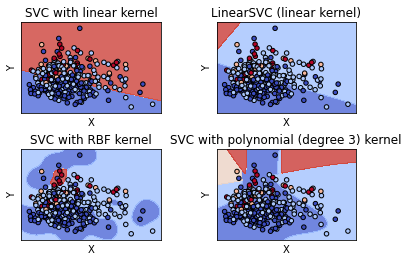

In [215]:
# plot title 형성
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# plot 그리기

fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()